<a href="https://colab.research.google.com/github/heidaralavi/Fetch-daily-product/blob/main/compairing%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!git clone https://github.com/heidaralavi/Fetch-daily-product.git

In [2]:
import pandas as pd
import numpy as np

In [3]:
f='Daily production98-1400.xlsx'
#f='/content/Fetch-daily-product/Daily production98-1400.xlsx'
production_df = pd.DataFrame()
xl = pd.ExcelFile(f)
sheet_names=xl.sheet_names
for sheet_name in sheet_names:
    df_temp= pd.read_excel(f, sheet_name=sheet_name )
    production_df= production_df.append(df_temp,ignore_index = True)
        
production_df

,shamsidate,daily_production
0,13980101,11131
1,13980102,11514
2,13980103,11849
3,13980104,11722
4,13980105,9127
...,...,...
1079,14001213,13151
1080,14001214,13069
1081,14001215,13089
1082,14001216,13148


In [4]:
temp_arr=[]
for item in production_df.iloc[:,0].values:
  temp=(str(item))
  temp = temp[:4]+'/'+temp[4:6]+'/'+temp[6:]
  temp_arr.append(temp)

production_df.insert(0,'jdate' ,temp_arr)
production_df.drop(columns='shamsidate',inplace=True)
production_df

,jdate,daily_production
0,1398/01/01,11131
1,1398/01/02,11514
2,1398/01/03,11849
3,1398/01/04,11722
4,1398/01/05,9127
...,...,...
1079,1400/12/13,13151
1080,1400/12/14,13069
1081,1400/12/15,13089
1082,1400/12/16,13148


In [5]:
f='final_data.xlsx'
#f='/content/Fetch-daily-product/final_data.xlsx'
final_df= pd.read_excel(f,index_col=0)

In [6]:
final_df

,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day)
0,2019-03-21,1398/01/01,11131,860.78,12131.0,551.00
1,2019-03-22,1398/01/02,11514,789.73,12385.3,543.00
2,2019-03-23,1398/01/03,11849,854.57,12415.0,530.00
3,2019-03-24,1398/01/04,11722,862.67,12278.4,524.00
4,2019-03-25,1398/01/05,9127,585.07,9948.0,385.00
...,...,...,...,...,...,...
1079,2022-03-04,1400/12/13,13151,819.96,14243.0,164.00
1080,2022-03-05,1400/12/14,13069,755.44,13928.2,156.00
1081,2022-03-06,1400/12/15,13089,265.12,13950.7,162.00
1082,2022-03-07,1400/12/16,13148,480.42,13935.3,154.00


In [7]:
merged_df = pd.merge(final_df[['jdate','M+L+E(ton/day)']], production_df[['jdate','daily_production']],
                     on=['jdate'], how='outer')

In [8]:
merged_df

,jdate,M+L+E(ton/day),daily_production
0,1398/01/01,11131,11131
1,1398/01/02,11514,11514
2,1398/01/03,11849,11849
3,1398/01/04,11722,11722
4,1398/01/05,9127,9127
...,...,...,...
1079,1400/12/13,13151,13151
1080,1400/12/14,13069,13069
1081,1400/12/15,13089,13089
1082,1400/12/16,13148,13148


In [9]:
merged_df.insert(3,'difference',merged_df['M+L+E(ton/day)']-merged_df['daily_production'])

In [10]:
merged_df[merged_df['difference'] != 0]

,jdate,M+L+E(ton/day),daily_production,difference
92,1398/03/31,6193,14373,-8180
185,1398/06/31,0,10847,-10847
275,1398/09/30,11382,11204,178
364,1398/12/29,11955,12021,-66
550,1399/06/31,9510,9610,-100
709,1399/12/09,11211,11111,100
715,1399/12/15,11447,15486,-4039
832,1400/04/09,11152,11088,64
896,1400/06/11,12772,12662,110
1006,1400/09/30,13277,13270,7


In [11]:
mask=merged_df[merged_df['difference'] != 0]['jdate'].values

In [12]:
mask

array(['1398/03/31', '1398/06/31', '1398/09/30', '1398/12/29',
       '1399/06/31', '1399/12/09', '1399/12/15', '1400/04/09',
       '1400/06/11', '1400/09/30'], dtype=object)

In [13]:
final_df=final_df[final_df.jdate.isin(mask)==False].reset_index(drop=True)

In [14]:
final_df.describe(include='all')

C:\Users\heidar\AppData\Local\Temp/ipykernel_20304/742465262.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  final_df.describe(include='all')


,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day)
count,1074,1074,1074.000000,1074.000000,1074.000000,1074.000000
unique,1074,1074,NaN,NaN,NaN,NaN
top,2019-03-21 00:00:00,1398/01/01,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN
first,2019-03-21 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2022-03-08 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10118.290503,654.334562,10941.819898,414.284060
std,NaN,NaN,3810.099993,357.889681,4120.189434,269.552909
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,10546.000000,410.210000,11449.400000,166.007500


In [18]:
final_df=final_df[final_df['M+L+E(ton/day)'] > 10000]

Text(0, 0.5, 'Total Production per day (ton)')

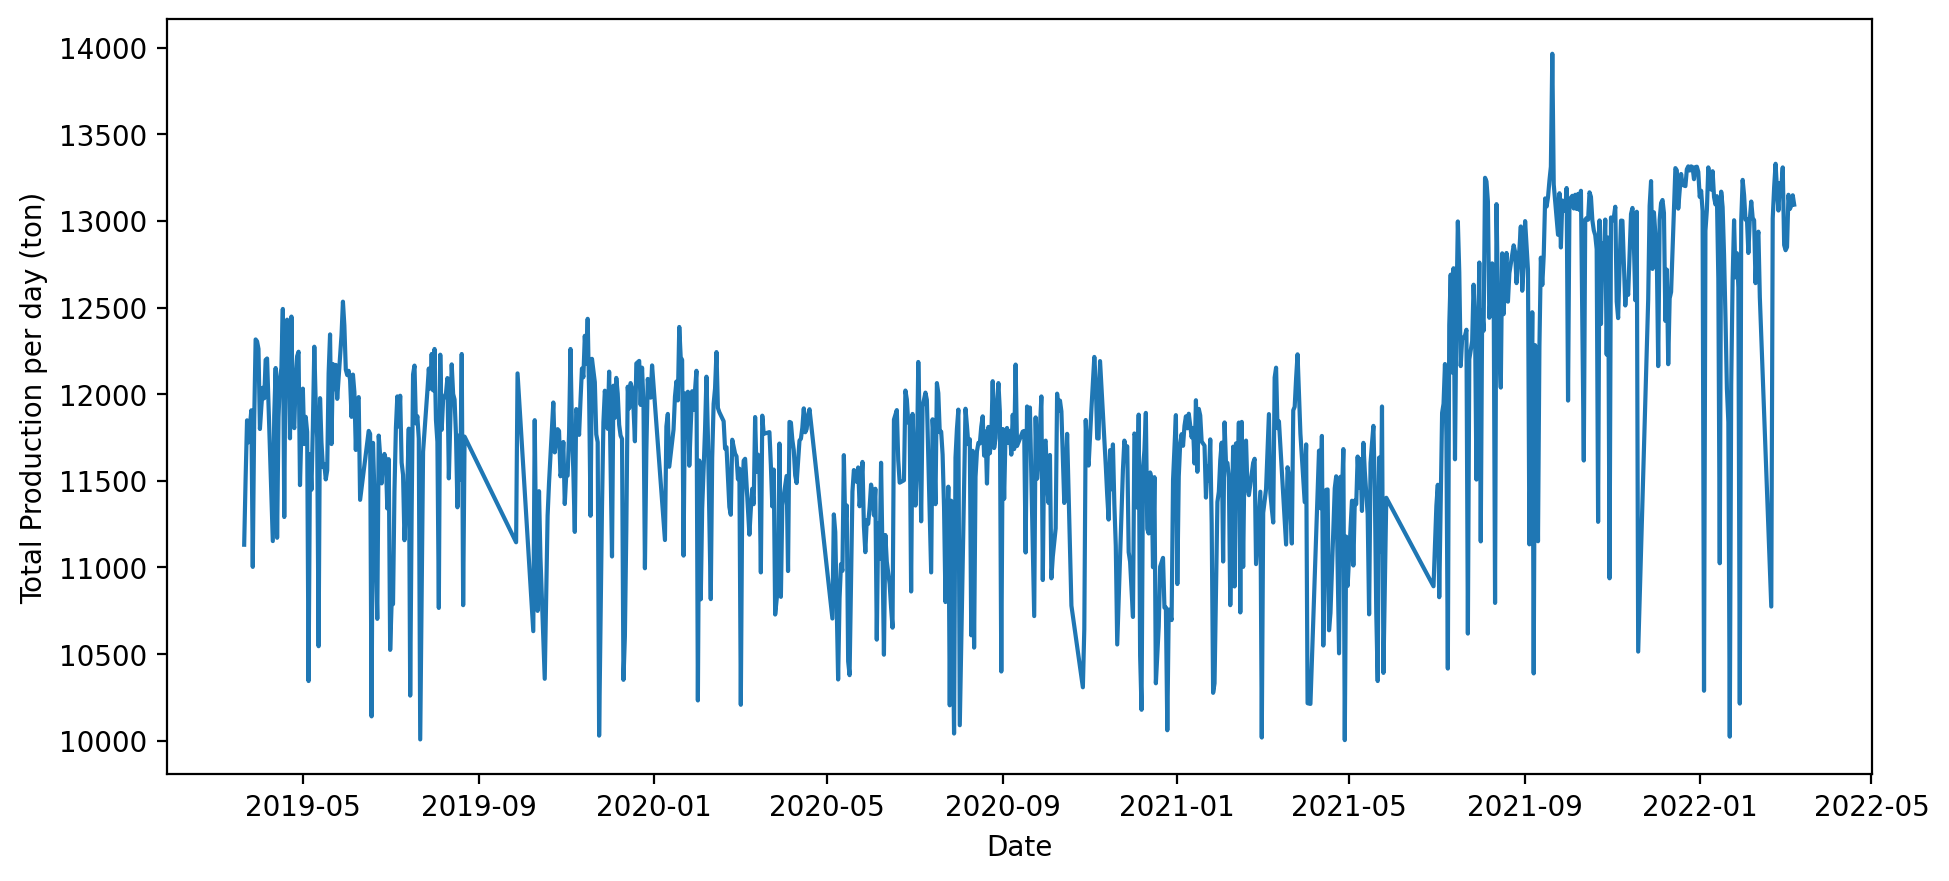

In [40]:
import matplotlib.pyplot as plt
fix , ax = plt.subplots(figsize=(11,5),dpi=200)
ax.plot(final_df['date'],final_df['M+L+E(ton/day)'],)
ax.set_xlabel('Date')
ax.set_ylabel('Total Production per day (ton)')

In [46]:
landa_df=final_df.copy()
landa=(final_df['A(ton/day)']-final_df['G(ton/day)']-final_df['H(ton/day)'])/final_df['M+L+E(ton/day)']
landa_df['landa'] = landa

In [47]:
landa_df

,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day),landa
0,2019-03-21,1398/01/01,11131,860.78,12131.0,551.00,0.963006
1,2019-03-22,1398/01/02,11514,789.73,12385.3,543.00,0.959924
2,2019-03-23,1398/01/03,11849,854.57,12415.0,530.00,0.930917
3,2019-03-24,1398/01/04,11722,862.67,12278.4,524.00,0.929170
5,2019-03-26,1398/01/06,11907,840.19,12961.5,481.00,0.977602
...,...,...,...,...,...,...,...
1069,2022-03-04,1400/12/13,13151,819.96,14243.0,164.00,1.008215
1070,2022-03-05,1400/12/14,13069,755.44,13928.2,156.00,0.996003
1071,2022-03-06,1400/12/15,13089,265.12,13950.7,162.00,1.033202
1072,2022-03-07,1400/12/16,13148,480.42,13935.3,154.00,1.011628


Text(0, 0.5, 'Total Production per day (ton)')

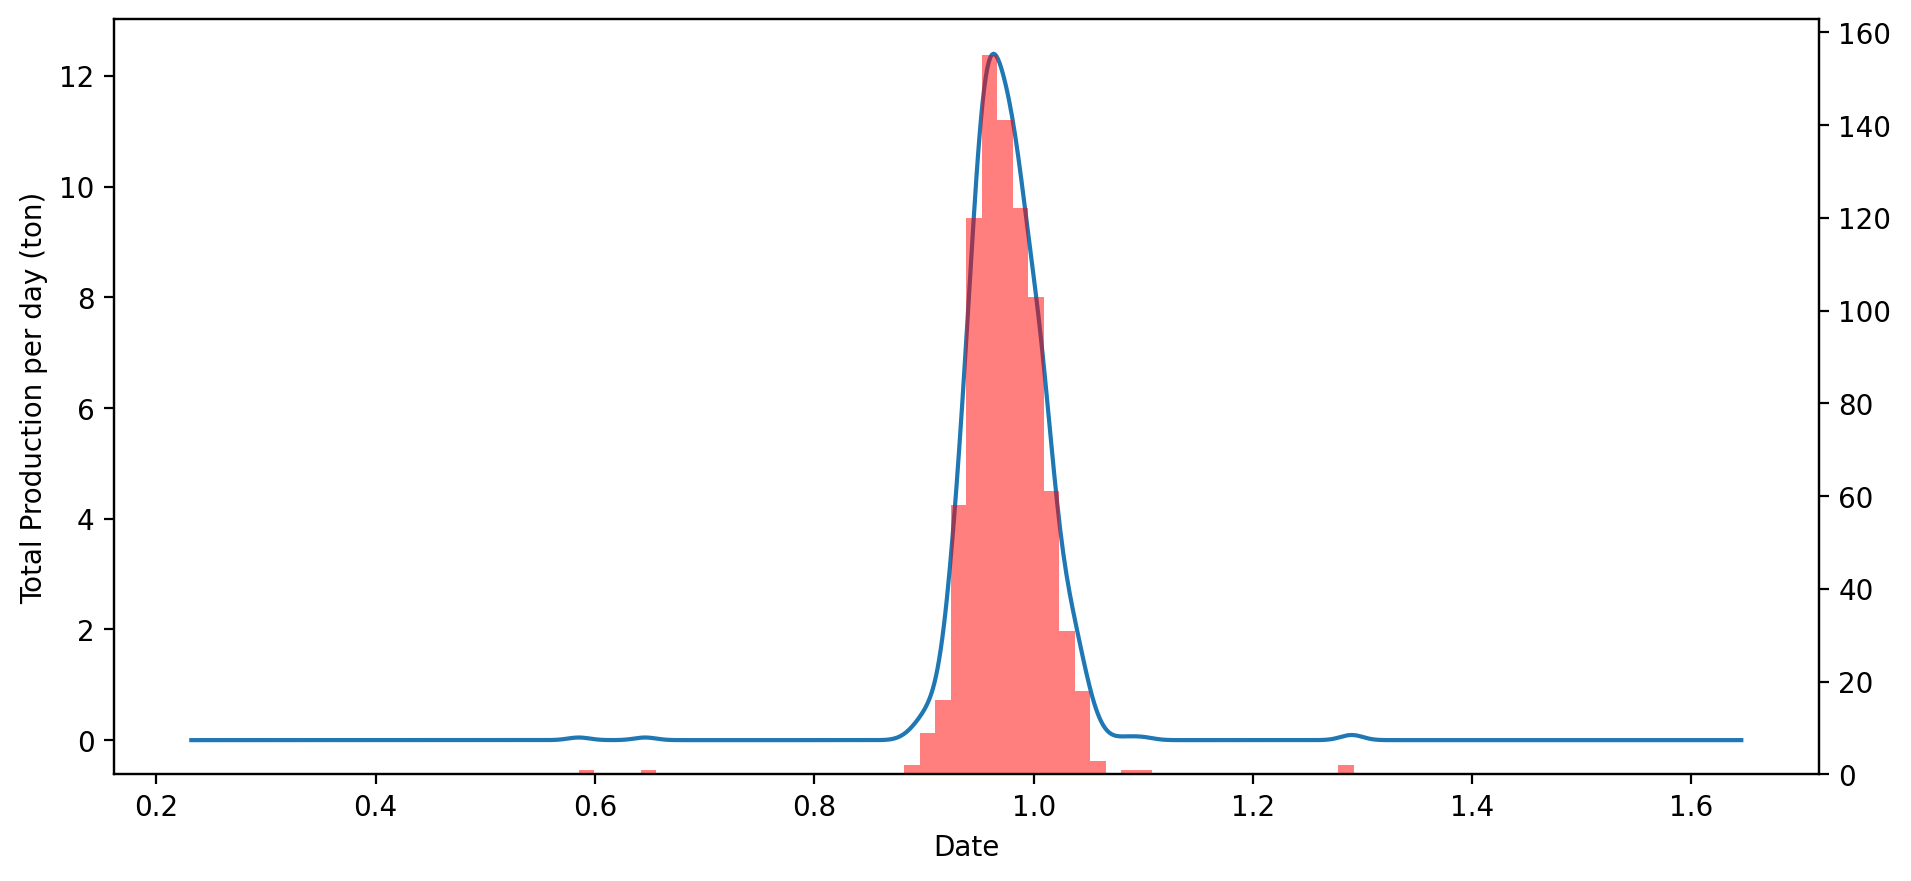

In [62]:
fix , ax = plt.subplots(figsize=(11,5),dpi=200)
landa_df.landa.plot(kind='kde', ax=ax)
landa_df.landa.plot(kind='hist', ax=ax, secondary_y=True,alpha=0.5,bins=50,color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Total Production per day (ton)')

In [90]:
a=np.where(landa_df.jdate == '1399/05/05')

In [93]:
b=np.where(landa_df.jdate == '1399/05/16')

In [94]:
print(a,b)

(array([372], dtype=int64),) (array([380], dtype=int64),)


In [76]:
landa_df[landa_df.values == '1399/05/05'].index

Int64Index([489], dtype='int64')

In [97]:
landa_df[a[0][0]:b[0][0]]

,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day),landa
489,2020-07-26,1399/05/05,10204,807.31,11304.87,617.00,0.968303
490,2020-07-27,1399/05/06,11385,1012.86,12574.88,703.00,0.953801
492,2020-07-29,1399/05/08,10041,681.31,11118.13,594.97,0.980166
493,2020-07-30,1399/05/09,11634,1135.82,12741.12,684.00,0.938740
494,2020-07-31,1399/05/10,11800,781.69,12908.06,682.00,0.969862
495,2020-08-01,1399/05/11,11911,1157.57,13081.44,707.03,0.941721
496,2020-08-02,1399/05/12,10089,835.91,10827.56,572.00,0.933655
498,2020-08-04,1399/05/14,11011,816.73,12368.69,643.03,0.990730


Text(0, 0.5, 'Total Production per day (ton)')

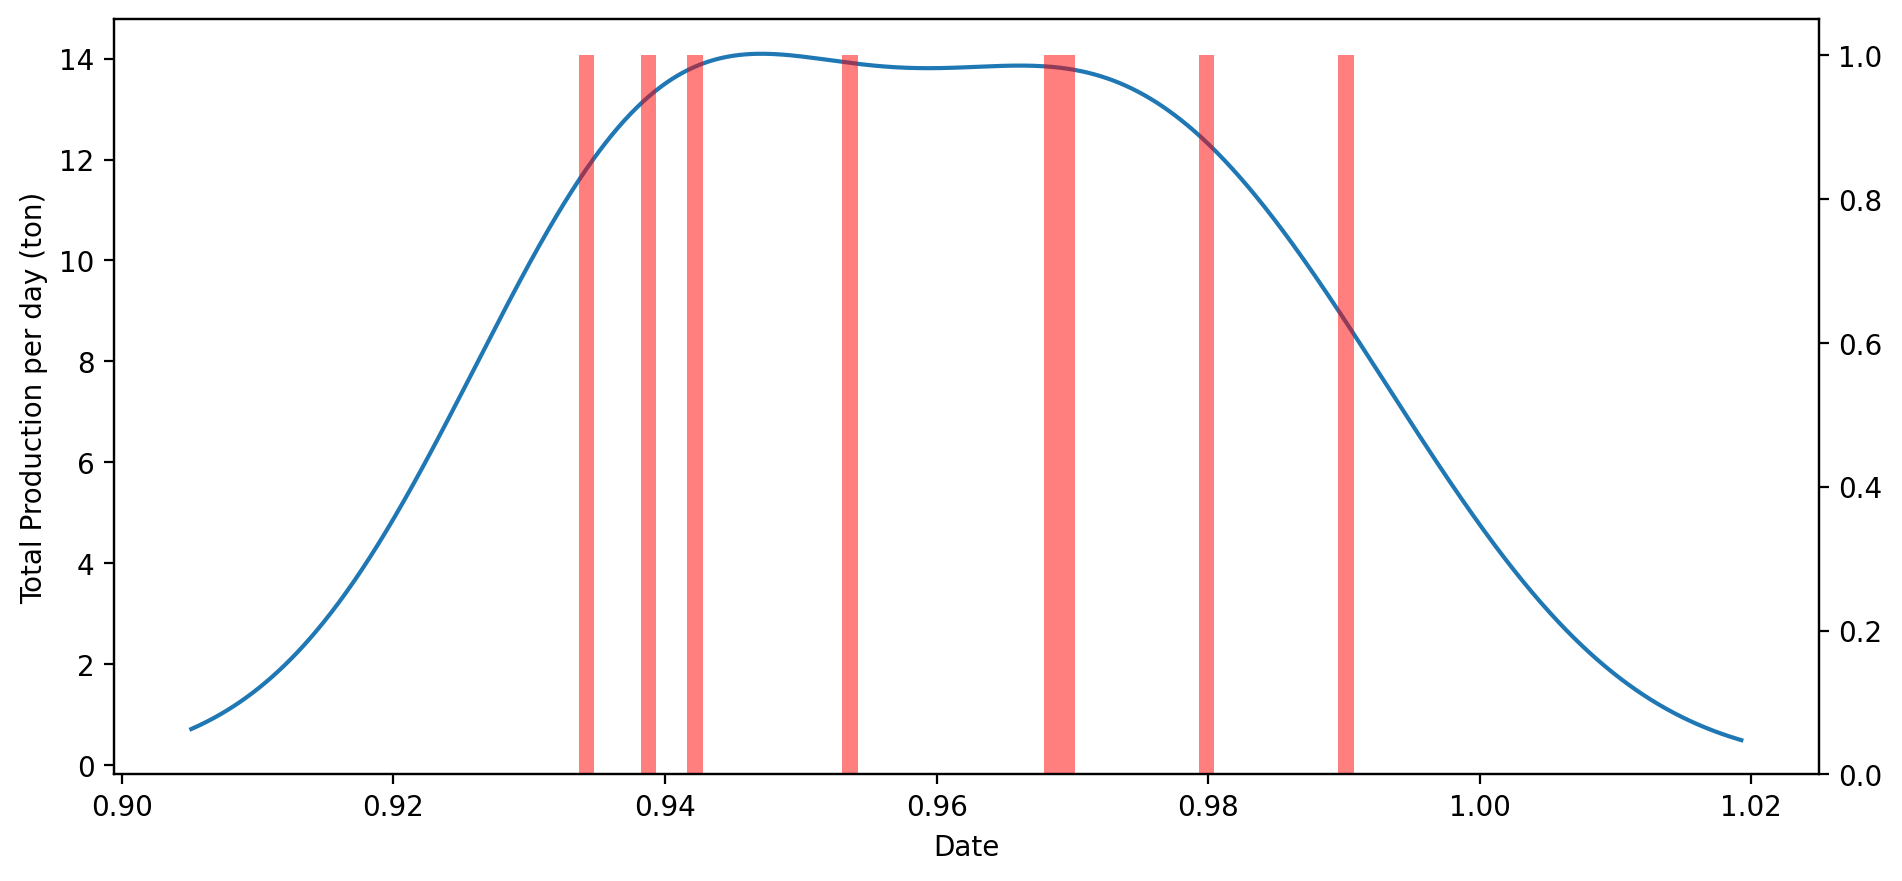

In [98]:
fix , ax = plt.subplots(figsize=(11,5),dpi=200)
landa_df[a[0][0]:b[0][0]].landa.plot(kind='kde', ax=ax)
landa_df[a[0][0]:b[0][0]].landa.plot(kind='hist', ax=ax, secondary_y=True,alpha=0.5,bins=50,color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Total Production per day (ton)')